# $\zeta$-Space of colored noises

--------------------------------

This notebook is an example of the $\zeta$-space application over colored noise signals. The implementation is presented [here](https://github.com/rsautter/Zeta-Space). 

In [1]:
!pip install MFDFA
!pip install git+https://github.com/rsautter/Chi-Space

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rsautter/Chi-Space to /tmp/pip-req-build-qkx_wl8w
  Running command git clone -q https://github.com/rsautter/Chi-Space /tmp/pip-req-build-qkx_wl8w
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for Chi-Space: filename=Chi_Space-0.2-py3-none-any.whl size=10939 sha256=fffdf2fa3adcae395358ab8c8863ecdb42a9db8f49adcd97a6a4bf92712ff437
  Stored in directory: /tmp/pip-ephem-wheel-cache-31nichk0/wheels/11/52/c8/03ed706750385b25afa569b1e10c2025b8705d8eacf48e5f79
Successfully built Chi-Space


In [2]:
import chi
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [ ]:

teste = pickle.dumps(np.array([[1,2,3],[7,8,9]]))
print(pickle.loads(teste))

[[1 2 3]
 [7 8 9]]


# 1. Synthetic Colored Noise

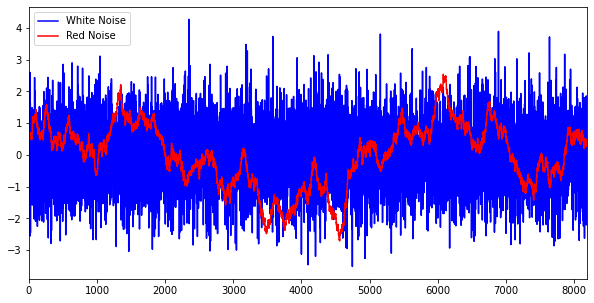

In [ ]:
wn = chi.cNoise(0,[2**13])
rn = chi.cNoise(2,[2**13])
wn = chi.normalize(wn)
rn = chi.normalize(rn)

plt.figure(figsize=(10,5))
plt.plot(wn,label='White Noise',color='blue')
plt.plot(rn,label='Red Noise',color='r')
plt.xlim(0,len(wn))
plt.legend()
plt.show()

# 2. Visualizing Set of Singularity Spectrum

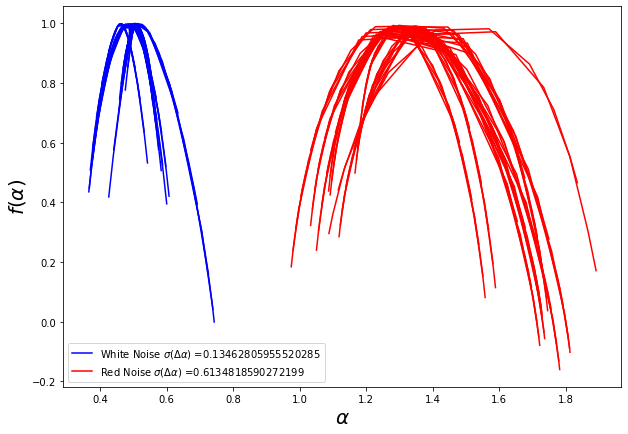

In [ ]:
aws, faws, cw  = chi.autoMFDFA(wn,nsamples=10)
ars, fars, cr  = chi.autoMFDFA(rn,nsamples=10)

plt.figure(figsize=(10,7))
for i in range(len(aws)):
  if i==0:
    plt.plot(aws[i],faws[i],color='b',label=r"White Noise $\sigma (\Delta \alpha)$ ="+str(cw))
  else:
    plt.plot(aws[i],faws[i],color='b')

for i in range(len(ars)):
  if i==0:
    plt.plot(ars[i],fars[i],color='r',label=r"Red Noise $ \sigma (\Delta \alpha)$ ="+str(cr))
  else:
    plt.plot(ars[i],fars[i],color='r')


plt.xlabel(r"$\alpha$",fontsize=20)
plt.ylabel(r"$f(\alpha)$",fontsize=20)

plt.legend()
plt.show()

# 3. Visualizing Power Spectrum Density

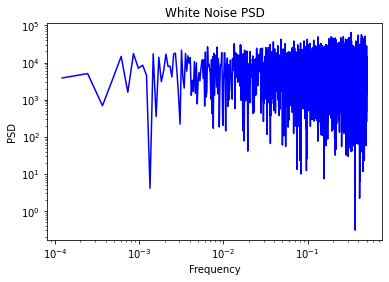

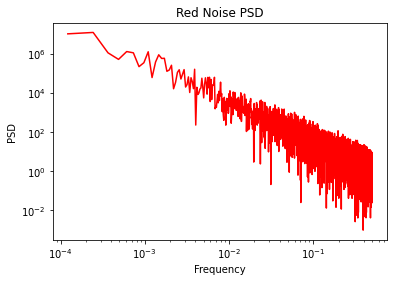

In [ ]:
import numpy as np

psdw = np.fft.fft(wn)
psdw = np.real(psdw*np.conj(psdw))
psdr = np.fft.fft(rn)
psdr = np.real(psdr*np.conj(psdr))

freq = np.fft.fftfreq(len(wn))
seq = np.argsort(freq)


psdw = psdw[seq]
psdr = psdr[seq]
freq = freq[seq]
psdw = psdw[freq>0]
psdr = psdr[freq>0]
freq = freq[freq>0]

plt.figure()
plt.title("White Noise PSD")
plt.loglog(freq,psdw,color="b")
plt.xlabel("Frequency")
plt.ylabel("PSD")

plt.figure()
plt.loglog(freq,psdr,color="r")
plt.title("Red Noise PSD")
plt.xlabel("Frequency")
plt.ylabel("PSD")
plt.show()

# 4. $\zeta$ - Space

In [ ]:
print("White Noise chi values:")
print(chi.chiSpace(wn))

White Noise zeta values:
{'GQQ': 0.0006248659537049228, 'LDA': 0.14357145149222617}


In [ ]:
print("Red Noise chi values:")
print(chi.chiSpace(rn))

Red Noise zeta values:
{'GQQ': 0.014866710378103942, 'LDA': 0.589290241503887}


## 4.1. Multiple samples of colored noise

In [3]:
import pandas as pd
import tqdm

sampleSize = 2**13
nsamples = 200
wn,pn,rn = [],[],[]
swn,spn,srn = [],[],[]

for i in tqdm.tqdm(range(nsamples)):
  try:
    serie = chi.cNoise(0,[sampleSize])
    wn.append(chi.chiSpace(serie,nsamples=10))
    swn.append( pickle.dumps(serie))
  except Exception as e:
    # Threshold should be lower to see any Singularity spectrum, but it should not be a problem in this example
    pass
  try:
    serie = chi.cNoise(1,[sampleSize])
    pn.append(chi.chiSpace(serie,nsamples=10) )
    spn.append( pickle.dumps(serie))
  except Exception as e:
    # Threshold should be lower to see any Singularity spectrum, but it should not be a problem in this example
    pass
  try:
    serie = chi.cNoise(2,[sampleSize])
    rn.append(chi.chiSpace(serie,nsamples=10) )
    srn.append( pickle.dumps(serie))
  except Exception as e:
    # Threshold should be lower to see any Singularity spectrum, but it should not be a problem in this example
    pass

wn = pd.DataFrame(wn)
pn = pd.DataFrame(pn)
rn = pd.DataFrame(rn)
wn['serie'] = swn
pn['serie'] = spn
rn['serie'] = srn

100%|██████████| 200/200 [10:46<00:00,  3.23s/it]


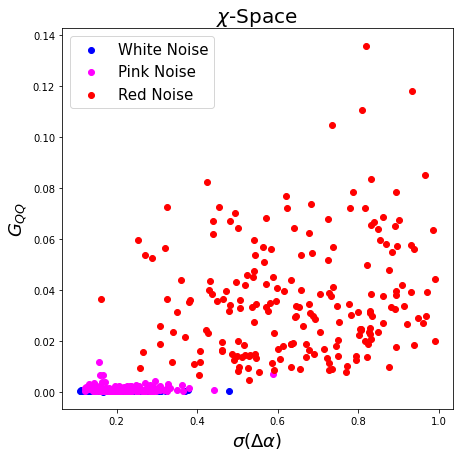

In [4]:
plt.figure(figsize=(7,7))
plt.scatter(wn["LDA"],wn["GQQ"],color='b',label="White Noise")
plt.scatter(pn["LDA"],pn["GQQ"],color='magenta',label="Pink Noise")
plt.scatter(rn["LDA"],rn["GQQ"],color='r',label="Red Noise")
plt.xlabel(r"$\sigma(\Delta \alpha)$",fontsize=18)
plt.ylabel(r"$G_{QQ}$",fontsize=18)
plt.title(r"$\chi$-Space",fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [5]:
wn.to_csv("zWhite.csv")
pn.to_csv("zPink.csv")
rn.to_csv("zRed.csv")

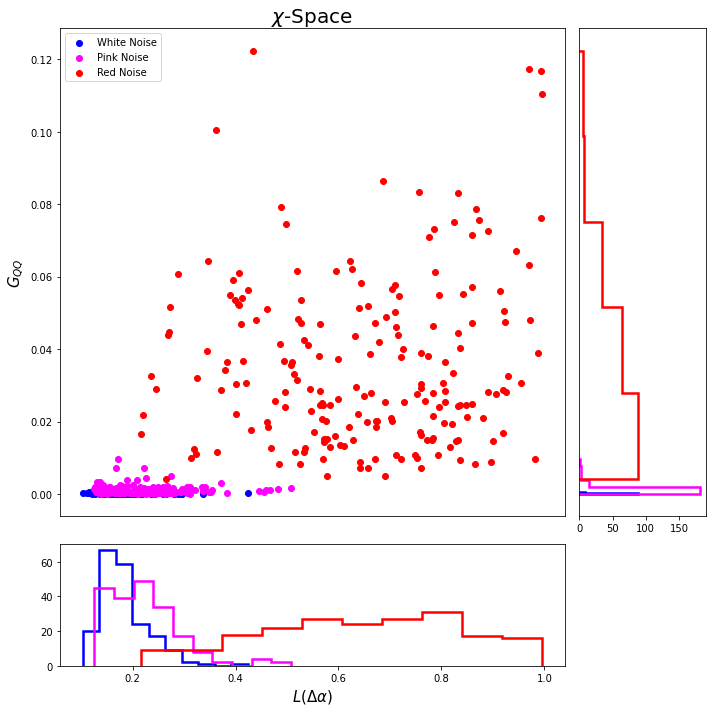

In [ ]:
from matplotlib.gridspec import GridSpec
plt.figure(figsize=(10,10))

gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[4, 1])

plt.subplot(gs[0,0])
plt.title(r"$\chi$-Space",fontsize=20)
plt.scatter(wn["LDA"],wn["GQQ"],color='b',label="White Noise")
plt.scatter(pn["LDA"],pn["GQQ"],color='magenta',label="Pink Noise")
plt.scatter(rn["LDA"],rn["GQQ"],color='r',label="Red Noise")
plt.ylabel("$G_{QQ}$",fontsize=15)
plt.xticks([])
plt.legend()

plt.subplot(gs[0,1])
plt.hist(wn['GQQ'],color='b',histtype='step',orientation='horizontal',lw=2.5,bins=5)
plt.hist(pn['GQQ'],color='magenta',histtype='step',orientation='horizontal',lw=2.5,bins=5)
plt.hist(rn['GQQ'],color='r',histtype='step',orientation='horizontal',lw=2.5,bins=5)
plt.yticks([])

plt.subplot(gs[1,0])
plt.hist(wn['LDA'],color='b',histtype='step',lw=2.5)
plt.hist(pn['LDA'],color='magenta',histtype='step',lw=2.5)
plt.hist(rn['LDA'],color='r',histtype='step',lw=2.5)
plt.xlabel(r"$L(\Delta\alpha)$",fontsize=15)

plt.tight_layout()
plt.show()